# Final Projuct

### By Wenhao Chen & Longfei Wang

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
df = pd.read_csv("data_cars.csv")
df.head(10)

,StockNumber,Vin,Year,Make,Model,Price,Color,Miles,DriveTrain,Transmission,Msrp,Cylinders,EngineSize
0,18789063,19UUA86209A020036,2009,Acura,TL,12998.0,White,55K,2WD,Automatic,35000.0,6,3.5L
1,18881245,19UUA9F50EA000959,2014,Acura,TL,17998.0,Black,68K,4WD,Automatic,43400.0,6,3.7L
2,18361640,1GYS4BKJ8GR417042,2016,Cadillac,Escalade,41998.0,Black,32K,4WD,Automatic,79700.0,8,6.2L
3,18040834,3GYFNAE36FS561271,2015,Cadillac,SRX,17998.0,Black,44K,2WD,Automatic,37700.0,6,3.6L
4,18780539,1GCGTCEN2J1308133,2018,Chevrolet,Colorado,27998.0,White,24K,4WD,Automatic,34000.0,6,3.6L
5,18854634,3G1BE6SM9HS511541,2017,Chevrolet,Cruze,14599.0,Black,30K,2WD,Automatic,22000.0,4,1.4L
6,18218761,2GNAXKEV5K6192047,2019,Chevrolet,Equinox,17998.0,White,26K,2WD,Automatic,27200.0,4,1.5L
7,18845054,1G1ZB5ST5JF107378,2018,Chevrolet,Malibu,16998.0,Black,20K,2WD,Automatic,23300.0,4,1.5L
8,18857647,1G1ZB5ST8GF306451,2016,Chevrolet,Malibu,14998.0,White,29K,2WD,Automatic,23200.0,4,1.5L
9,18858462,1G1ZC5ST0JF215940,2018,Chevrolet,Malibu,14998.0,Gray,42K,2WD,Automatic,23300.0,4,1.5L


## Data Cleaning

In [55]:
#Check the baisc info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29900 entries, 0 to 29899
Data columns (total 13 columns):
StockNumber     29900 non-null int64
Vin             29900 non-null object
Year            29900 non-null int64
Make            29900 non-null object
Model           29900 non-null object
Price           29900 non-null float64
Color           29817 non-null object
Miles           29900 non-null object
DriveTrain      29900 non-null object
Transmission    29900 non-null object
Msrp            28479 non-null float64
Cylinders       29900 non-null int64
EngineSize      29894 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 3.0+ MB


In [56]:
#Check if the dataset have na
df.isnull().sum()

StockNumber        0
Vin                0
Year               0
Make               0
Model              0
Price              0
Color             83
Miles              0
DriveTrain         0
Transmission       0
Msrp            1421
Cylinders          0
EngineSize         6
dtype: int64

In [57]:
# Check unique values of the dataset
df.nunique()

StockNumber     29875
Vin             29875
Year               14
Make               36
Model             528
Price             421
Color              13
Miles             131
DriveTrain          2
Transmission        5
Msrp             1359
Cylinders           7
EngineSize         48
dtype: int64

In [58]:
# Since the 'StockNumber' and 'Vin' are unique and the number of them is less than the total number, 
# there must be some duplicates in our dataset.
# We need to drop them first.
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(29900, 13)
(29875, 13)


In [59]:
# The 'StockNumber' and 'Vin' are usless for our predict and the 'Model' depends on 'Make', the name of manufacturer, so we drop those columns.
df.drop(["StockNumber", "Vin", "Model"], axis=1, inplace=True)
df.head()

,Year,Make,Price,Color,Miles,DriveTrain,Transmission,Msrp,Cylinders,EngineSize
0,2009,Acura,12998.0,White,55K,2WD,Automatic,35000.0,6,3.5L
1,2014,Acura,17998.0,Black,68K,4WD,Automatic,43400.0,6,3.7L
2,2016,Cadillac,41998.0,Black,32K,4WD,Automatic,79700.0,8,6.2L
3,2015,Cadillac,17998.0,Black,44K,2WD,Automatic,37700.0,6,3.6L
4,2018,Chevrolet,27998.0,White,24K,4WD,Automatic,34000.0,6,3.6L


In [60]:
# Then, drop the missing values
df = df.dropna()

In [61]:
# We need to transform the 'Miles' and 'EngineSize' columns to numerical columns.
from sklearn.preprocessing import FunctionTransformer

def custom_transformation(cols):
    for col in cols:
        df[col] = df[col].replace('New', '0', regex = True).replace('K', '', regex = True).replace('L', '', regex = True).astype(float)

ft = FunctionTransformer(func=custom_transformation, validate=False)

ft.fit_transform([ 'Miles', 'EngineSize'])

# We find that there are some 0 in the dataset, which are also missing values. We need to drop them.
print(df.shape)
df['Cylinders'] = df['Cylinders'].replace(0, np.nan)
df['Msrp'] = df['Msrp'].replace(0, np.nan)
df['EngineSize'] = df['EngineSize'].replace(0, np.nan)
df = df.dropna()
print(df.shape)

(28365, 10)
(27837, 10)


In [62]:
#Check the baisc info of the dataset again to ensure that all those data cleaning things have been done.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27837 entries, 0 to 29899
Data columns (total 10 columns):
Year            27837 non-null int64
Make            27837 non-null object
Price           27837 non-null float64
Color           27837 non-null object
Miles           27837 non-null float64
DriveTrain      27837 non-null object
Transmission    27837 non-null object
Msrp            27837 non-null float64
Cylinders       27837 non-null float64
EngineSize      27837 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.3+ MB


## Model fitting

<Figure size 1800x432 with 0 Axes>

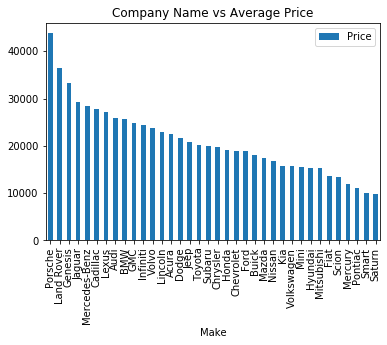

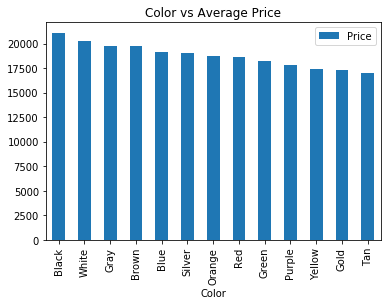

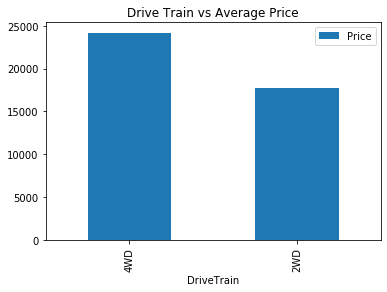

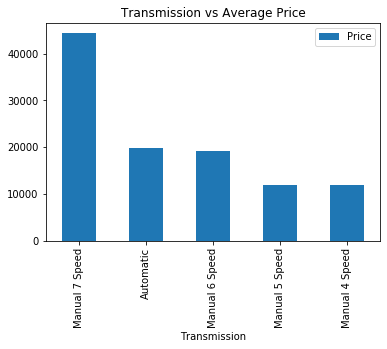

In [63]:
# To predict the price, We need to check the relationship between the categorical variables and the outcome variable 
# to judge whether the categorical variables impact price of the cars.
plt.figure(figsize=(25, 6))

dfvs = pd.DataFrame(df.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
dfvs.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

dfvs = pd.DataFrame(df.groupby(['Color'])['Price'].mean().sort_values(ascending = False))
dfvs.plot.bar()
plt.title('Color vs Average Price')
plt.show()

dfvs = pd.DataFrame(df.groupby(['DriveTrain'])['Price'].mean().sort_values(ascending = False))
dfvs.plot.bar()
plt.title('Drive Train vs Average Price')
plt.show()

dfvs = pd.DataFrame(df.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
dfvs.plot.bar()
plt.title('Transmission vs Average Price')
plt.show()

In [64]:
# Only the colors of the cars have little impact to price. 
# So we should drop the color variable.
df.drop('Color', axis=1, inplace=True)

# Then, change remaining categorical variables to dummy variables .
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df = dummies('Make',df)
df = dummies('DriveTrain',df)
df = dummies('Transmission',df)

# df.head()
df.shape

(27837, 46)

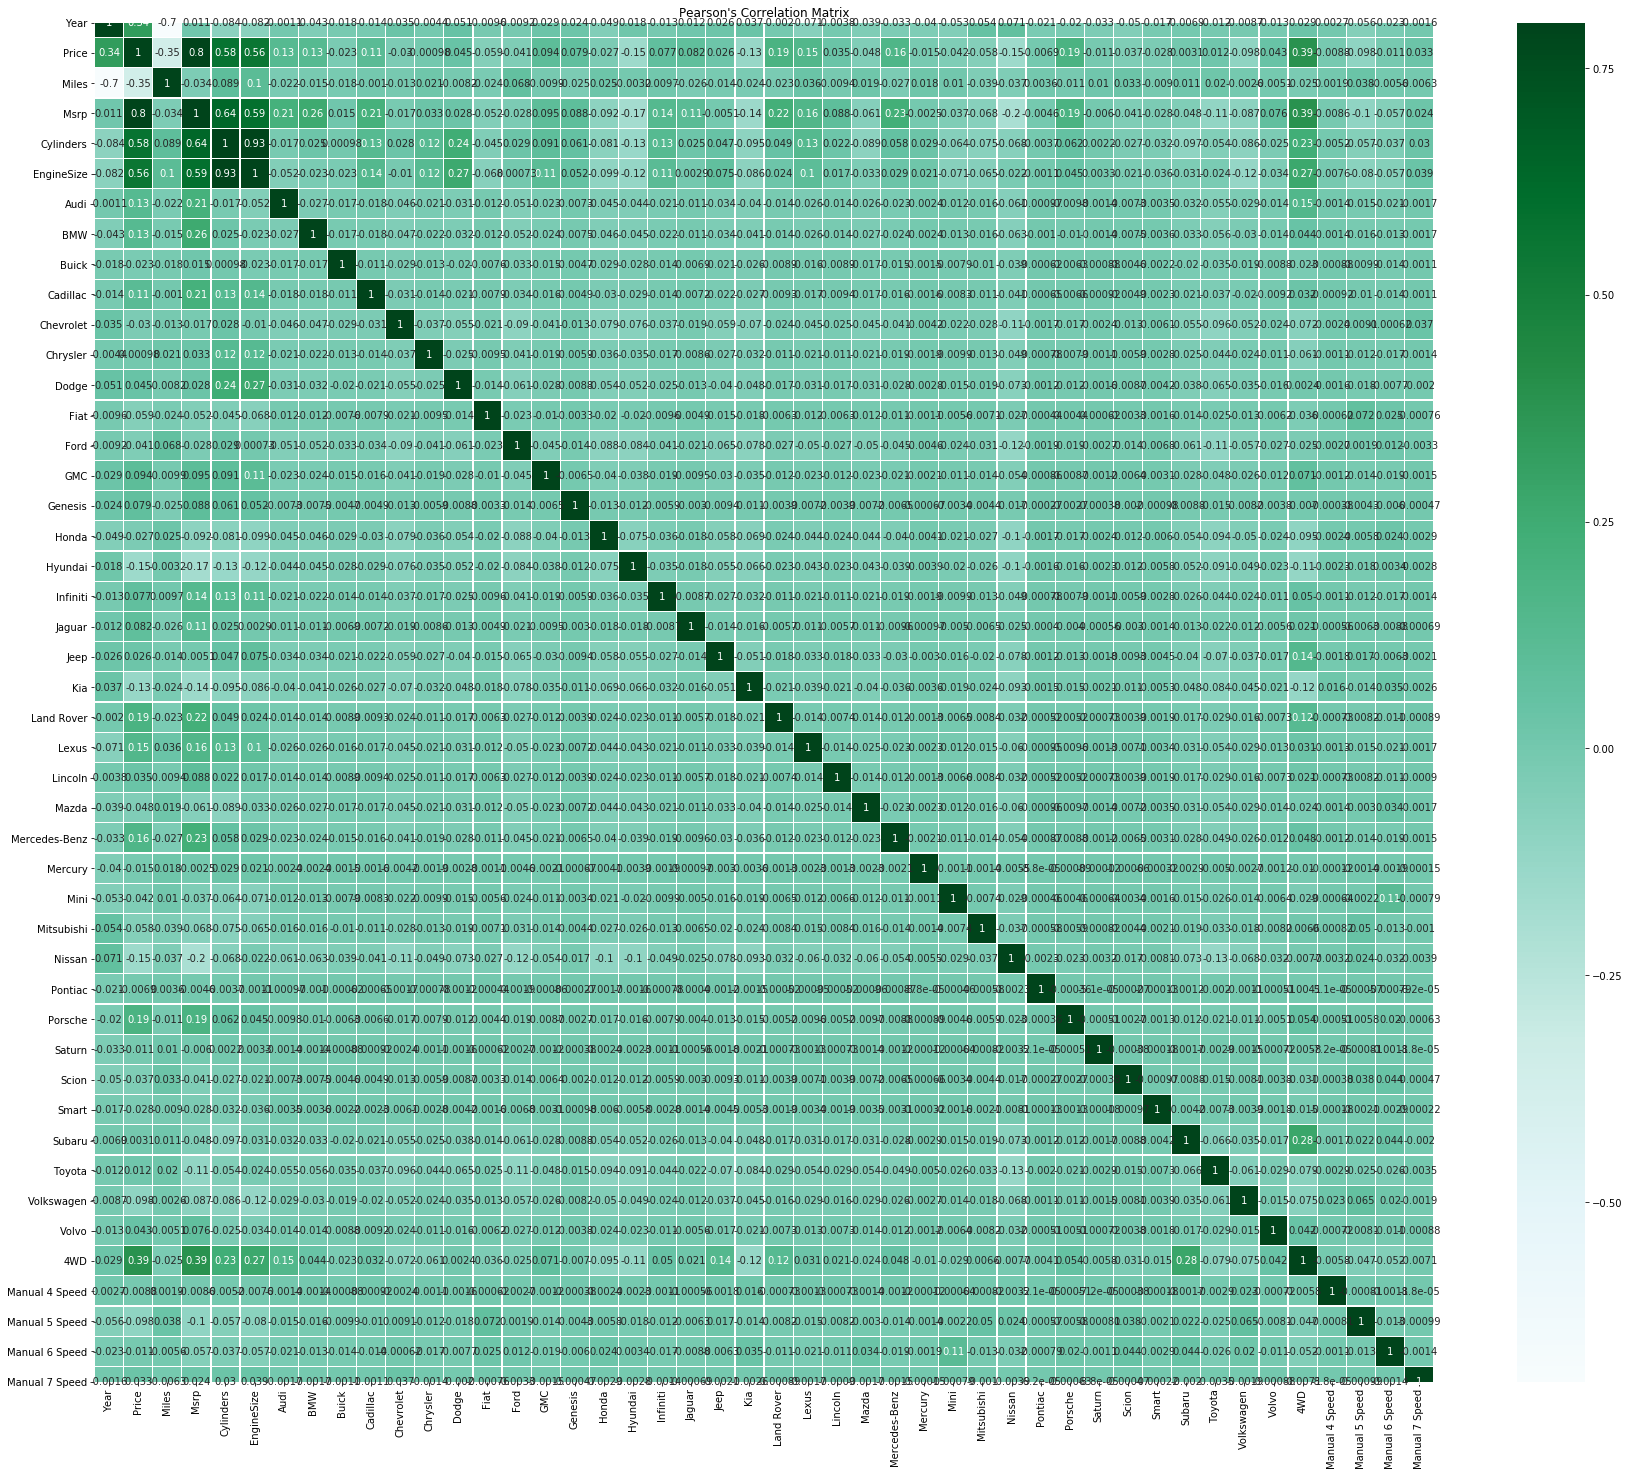

In [65]:
# Check strong correlation among independent variables.
f, ax = plt.subplots(figsize=(30, 25))
plt.title("Pearson's Correlation Matrix")

sns.heatmap(df.corr(), cmap="BuGn", linewidths=0.25, linecolor='w', vmax = 0.8, annot=True)

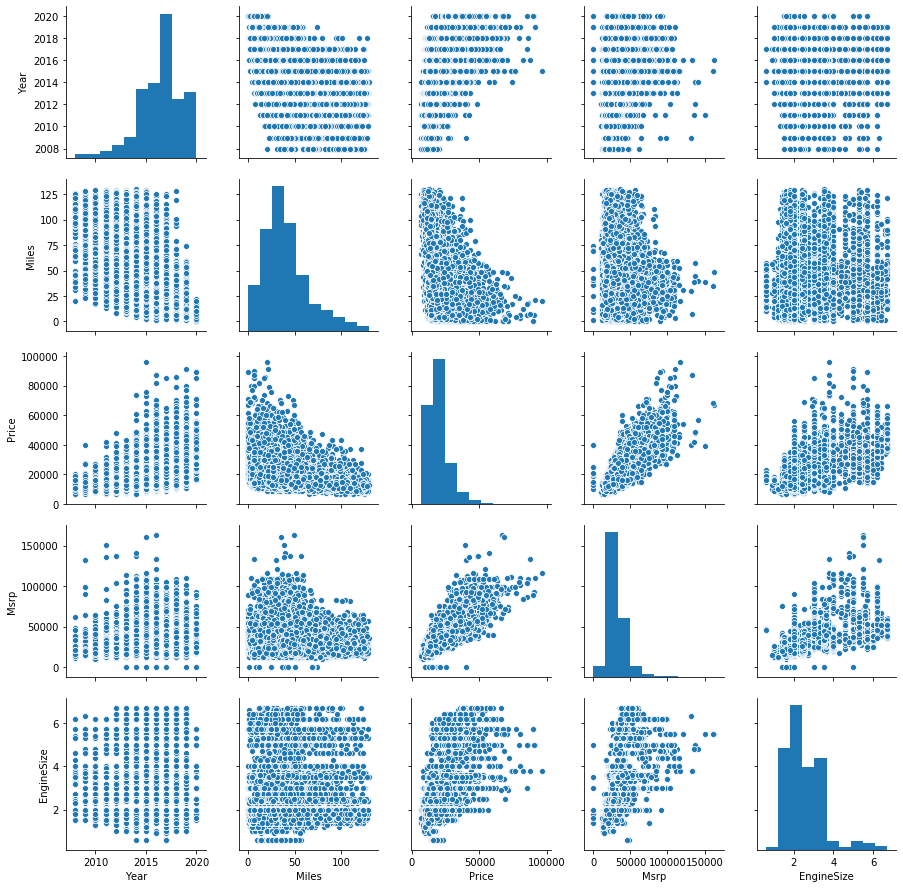

In [66]:
# The 'Cylinders' variable has strong correlation with 'EngineSize' Variable.
# Drop 'Cylinders'.
df = df.drop('Cylinders', axis=1)

# Check the relationship between numerical variables and the outcome variable. 
sns.pairplot(df[['Year', 'Miles', 'Price', 'Msrp', 'EngineSize']])

In [67]:
# All the Year, Miles, Msrp and EngineSize are quasi-linear with price variable, so we don’t need to drop any variables.

# Split our data into training data and testing data
np.random.seed(0)
train_data, test_data = train_test_split(df, train_size = 0.7, random_state=1)

features = df.drop('Price', axis=1).columns

In [68]:
# Fit the linear model.
lm = linear_model.LinearRegression()
lm.fit(df[features], df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Show intercept and coefficients of the model
print('Intercept: {}'.format(lm.intercept_))
print('Coefficients: {}'.format(lm.coef_))

Intercept: -1557007.0230000715
Coefficients: [ 7.74282554e+02 -6.70393045e+01  3.88783719e-01  1.79818317e+03
  1.18099219e+03  1.90078172e+02 -3.51769018e+02 -2.43733193e+03
  9.49755749e+02 -8.01863304e+02 -2.53884362e+02  2.29615361e+02
  1.42401255e+03  1.32917688e+03  1.71192269e+03  3.67456060e+03
  1.26348815e+03 -4.62483201e+02  1.38338738e+03  1.34858794e+03
  8.09734635e+02  3.85180453e+03  3.91748106e+03 -9.52550426e+02
  2.09548712e+03  1.97866499e+03 -1.19032754e+03  2.47596207e+03
  2.95261494e+01  7.58942499e+02  3.91170658e+03  8.37132602e+03
  3.19205098e+03  3.51229847e+03  2.13507803e+03  2.50623156e+03
  3.88268825e+03  1.18509323e+03  1.64389010e+03  1.09804018e+03
 -5.99424590e+02  1.00795840e+03  2.44978628e+03  6.69284814e+03]


In [70]:
# Make a prediction on testing data.
pred = lm.predict(test_data[features])

# Show the model score
lm.score(test_data[features],test_data['Price'])

0.8347959231851461

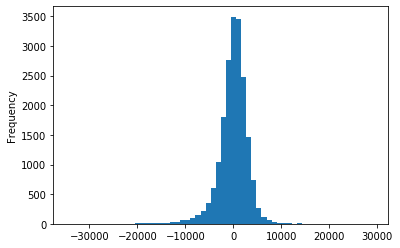

In [71]:
# Analyze the residuals
# Distribution of residuals
res = lm.predict(train_data[features]) - train_data['Price']
res.plot(kind = 'hist', bins = 60)

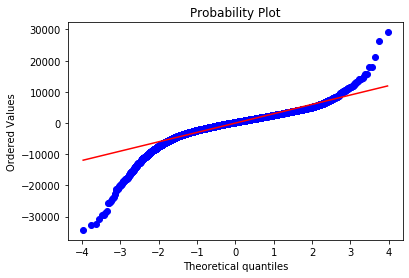

In [72]:
# QQ-plot of residuals
from scipy import stats

stats.probplot(res, dist="norm", plot=plt)
plt.show()

The residuals seem to be approximately Normally distributed, so the assumption on the linear modeling seems to be fulfilled.

We can see that our model is fairly good. However, here is a problem that the distribution of residuals is a little skewed, not symmetrical, so we want to solve this problem. 

The method is adding log transformation to the outcome variable to improve the Normality of residuals.

## Model improvement

In [73]:
# Add log transformation to outcome variable.
df['Price'] = np.log1p(df['Price'])

# Split our data into training data and testing data
np.random.seed(0)
train_data, test_data = train_test_split(df, train_size = 0.7, random_state=1)

features = df.drop('Price', axis=1).columns

In [74]:
# Fit the linear model.
lm = linear_model.LinearRegression()
lm.fit(df[features], df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# Show intercept and coefficients of the model
print('Intercept: {}'.format(lm.intercept_))
print('Coefficients: {}'.format(lm.coef_))

Intercept: -74.6287509329881
Coefficients: [ 4.16098501e-02 -3.38710755e-03  1.41889208e-05  9.25031876e-02
  5.82539962e-02  1.67151695e-02 -4.30743876e-02 -1.18801799e-01
 -2.84908833e-02 -6.10215629e-02 -7.11052939e-02 -1.11480862e-01
 -3.30071640e-03  2.45294358e-02  2.96316903e-02  1.24130247e-01
 -3.23333601e-02 -1.74316421e-02  6.49792654e-02  1.62186814e-02
 -4.83858692e-02  7.35559013e-02  1.41700959e-01 -3.24412441e-02
  3.60115685e-02  7.06341742e-02 -1.79634699e-01  5.19297748e-02
 -1.06490389e-01 -4.84935218e-02  1.49510894e-02  1.73269855e-01
 -7.78814154e-02  3.74200220e-02 -1.76159228e-01  7.11346188e-02
  1.01655123e-01 -2.64330369e-02  6.63489745e-02  6.98081361e-02
 -1.33608667e-01 -8.03230307e-02  7.16084712e-02  1.19344282e-01]


In [76]:
# Make a prediction on testing data.
pred = lm.predict(test_data[features])

# Show the model score
lm.score(test_data[features],test_data['Price'])

0.8748337238389039

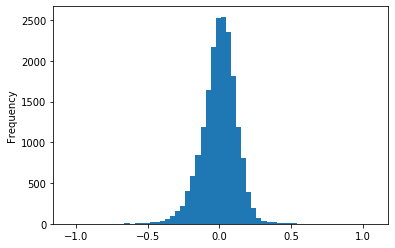

In [77]:
# Analyze the residuals
# Distribution of residuals
res = lm.predict(train_data[features]) - train_data['Price']
res.plot(kind = 'hist', bins = 60)

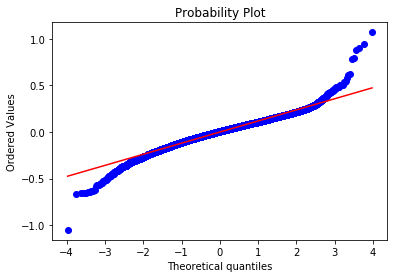

In [78]:
# QQ-plot of residuals
stats.probplot(res, dist="norm", plot=plt)
plt.show()

We notice that the score is improved, from 0.83 to 0.87, and the Normality is also improved! 
The model is successfully improved!